# **Komunitas Facebook**

In [ ]:
!pip uninstall community -y
!pip uninstall python-louvain -y
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=5cc8ec7e52b3e84d74129d885569bf9f295cb6cadfa6c484fb215ca0d5494a82
  Stored in directory: /root/.cache/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


['__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'best_partition', 'community_louvain', 'community_status', 'generate_dendrogram', 'induced_graph', 'load_binary', 'modularity', 'partition_at_level']
Modularity: 0.835


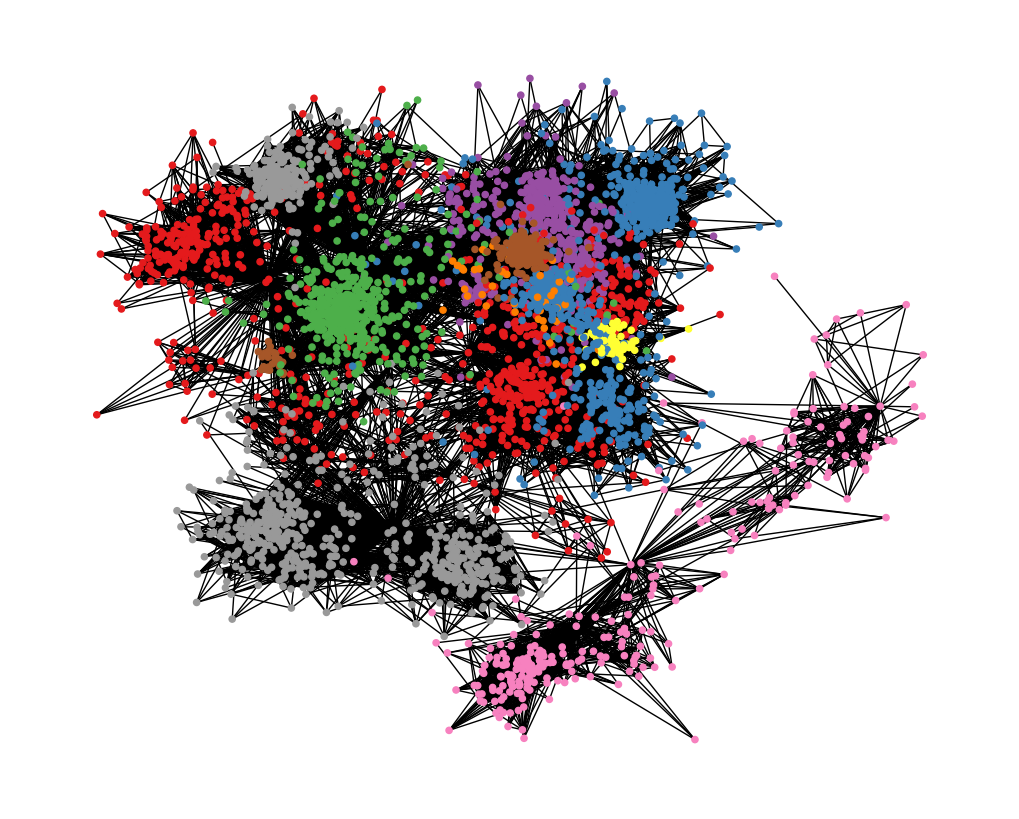

In [ ]:
import networkx as nx
import community as community_louvain # Pastikan import-nya begini
import matplotlib.pyplot as plt

print(dir(community_louvain))

filename = 'facebook_combined.txt'
G = nx.read_edgelist(filename, create_using=nx.Graph(), nodetype=int)

partition = community_louvain.best_partition(G)
mod = community_louvain.modularity(partition, G)

print(f"Modularity: {mod:.3f}")

# Visualisasi
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos,
        node_color=[partition[n] for n in G.nodes()],
        node_size=20,
        cmap=plt.cm.Set1,
        with_labels=False)
plt.show()

# keluarkan anggota dari setiap komunitas

In [ ]:
community_dict = {}

# Membuat dictionary komunitas (tetap memakai indeks asli)
for node, comm_id in partition.items():
    community_dict.setdefault(comm_id, []).append(node)

print("\n===== ANGGOTA SETIAP KOMUNITAS (mulai dari 1) =====")
for comm_id, members in community_dict.items():

    # Komunitas baru dimulai dari 1
    new_comm_id = comm_id + 1

    print(f"\nKomunitas {new_comm_id} (jumlah anggota: {len(members)})")
    print(members)



===== ANGGOTA SETIAP KOMUNITAS (mulai dari 1) =====

Komunitas 1 (jumlah anggota: 350)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

In [ ]:
target_id = 60
found = False

for comm_id, members in community_dict.items():
    if target_id in members:
        new_comm_id = comm_id + 1
        print(f"Node {target_id} ditemukan di Komunitas {new_comm_id}")
        print("Anggota komunitas tersebut:")
        print(members)
        found = True
        break

if not found:
    print(f"Node {target_id} tidak ditemukan di komunitas manapun.")


Node 60 ditemukan di Komunitas 1
Anggota komunitas tersebut:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

# gambar ulang graph dari komunitas terbanyak anggotanya


Komunitas Terbesar: 14
Jumlah Anggota: 548


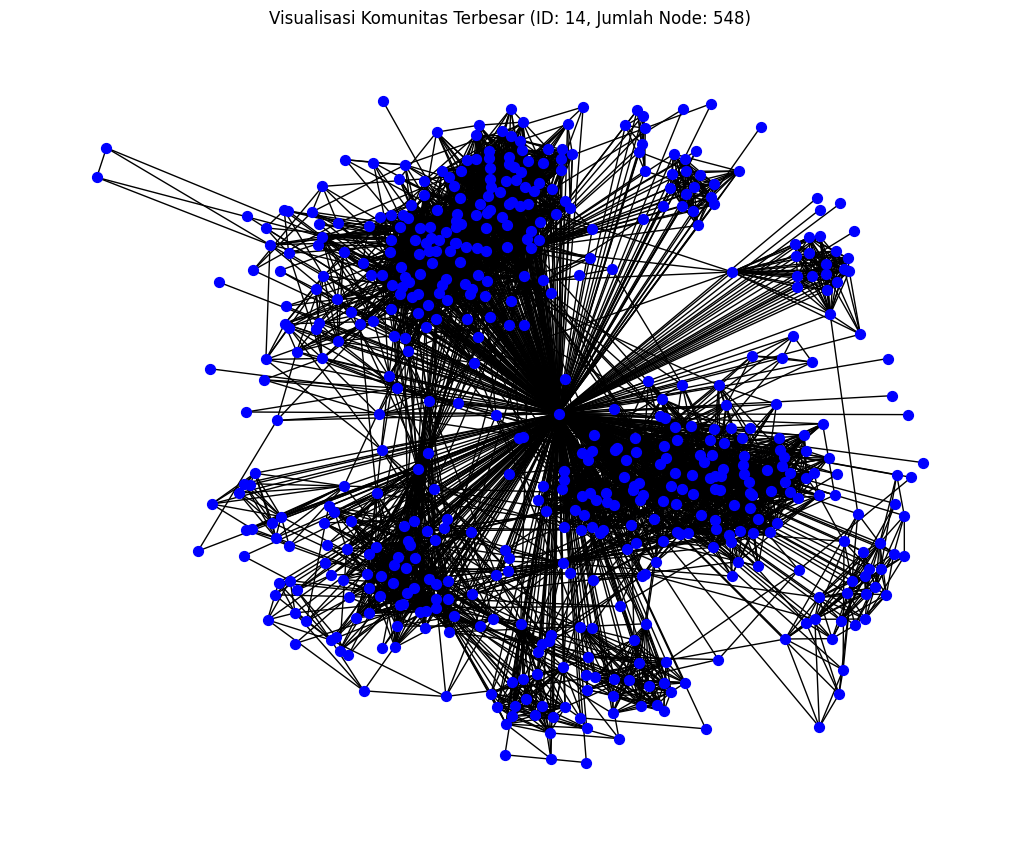

In [ ]:
community_sizes = {}
for node, comm_id in partition.items():
    community_sizes.setdefault(comm_id, []).append(node)

# Cari komunitas dengan anggota terbanyak
largest_comm_id = max(community_sizes, key=lambda c: len(community_sizes[c]))
largest_members = community_sizes[largest_comm_id]

print("\nKomunitas Terbesar:", largest_comm_id)
print("Jumlah Anggota:", len(largest_members))

# Buat subgraph berdasarkan node di komunitas terbesar
G_sub = G.subgraph(largest_members)

plt.figure(figsize=(10, 8))

# Layout posisi node (lebih stabil menggunakan seed)
pos_sub = nx.spring_layout(G_sub, seed=42)

nx.draw(
    G_sub, pos_sub,
    with_labels=False,
    node_size=50,
    node_color="blue",
    edge_color="black"
)

plt.title(f"Visualisasi Komunitas Terbesar (ID: {largest_comm_id}, Jumlah Node: {len(largest_members)})")
plt.show()


# deteksi komunitas dari komunitas terbesar


===== HASIL SUB-KOMUNITAS =====
Jumlah Sub-Komunitas : 9
Modularitas Subgraph : 0.620532186024928


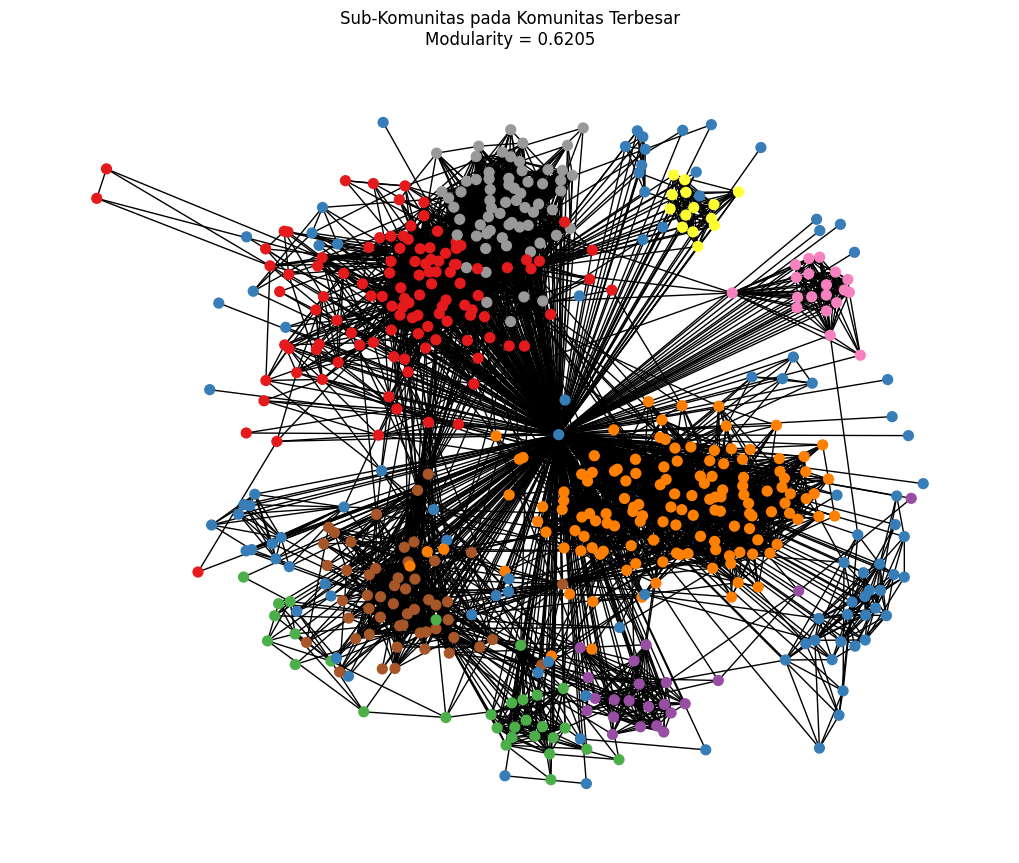

In [ ]:

sub_partition = community_louvain.best_partition(G_sub)

# Modularitas sub-komunitas
sub_modularity = community_louvain.modularity(sub_partition, G_sub)

print("\n===== HASIL SUB-KOMUNITAS =====")
print("Jumlah Sub-Komunitas :", len(set(sub_partition.values())))
print("Modularitas Subgraph :", sub_modularity)


plt.figure(figsize=(10, 8))
pos_sub = nx.spring_layout(G_sub, seed=42)

sub_colors = [sub_partition[n] for n in G_sub.nodes()]

nx.draw(
    G_sub, pos_sub,
    with_labels=False,
    node_size=50,
    node_color=sub_colors,
    cmap=plt.cm.Set1,
    edge_color="black"
)

plt.title(f"Sub-Komunitas pada Komunitas Terbesar\nModularity = {sub_modularity:.4f}")
plt.show()
